In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# 작업 디렉토리 변경
import os
print(os.getcwd(), end=' -> ')
os.chdir('/content/drive/MyDrive/Colab Notebooks/25-1pattern_recognition') # 바꾸기
print(os.getcwd())

/content/drive/MyDrive/Colab Notebooks/25-1pattern_recognition -> /content/drive/MyDrive/Colab Notebooks/25-1pattern_recognition


<ipython-input-7-064936a429fc>:14: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].median(), inplace=True)
<ipython-input-7-064936a429fc>:12: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 

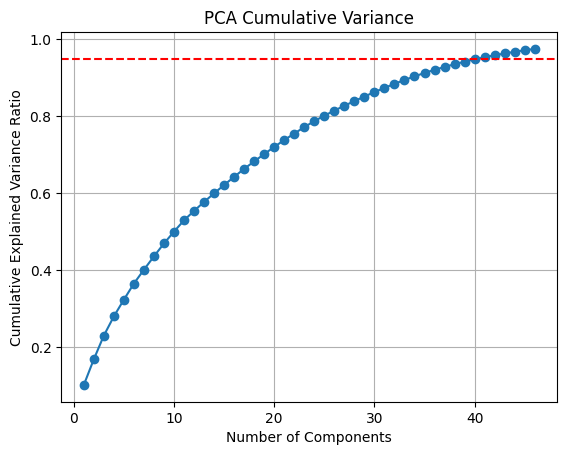

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# 1. CSV 파일 불러오기
df = pd.read_csv('train.csv')

# 2. 결측치 처리: 숫자형 → 중간값, 범주형 → 최빈값
for col in df.columns:
    if df[col].dtype == 'object':
        df[col].fillna(df[col].mode()[0], inplace=True)
    else:
        df[col].fillna(df[col].median(), inplace=True)

# 3. 범주형 변수 원-핫 인코딩
df = pd.get_dummies(df, columns=['data_channel', 'weekday'], drop_first=True)

# 4. 입력 변수(X), 라벨(y) 분리
X = df.drop(columns=['shares', 'y'])
y = df['shares']

# 5. 정규화
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 6. PCA 적용
pca = PCA(n_components=46)
pca.fit(X_scaled)

# 7. 누적 분산 시각화
cumulative_variance = pca.explained_variance_ratio_.cumsum()

plt.plot(range(1, 47), cumulative_variance, marker='o')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.title('PCA Cumulative Variance')
plt.grid(True)
plt.axhline(y=0.95, color='r', linestyle='--')  # 95%
plt.show()


In [ ]:
# 8. PCA 성분별 변수 기여도 확인
feature_names = X.columns  # 원래 특성 이름
components_df = pd.DataFrame(pca.components_, columns=feature_names)
components_df.index = [f'PC{i+1}' for i in range(len(components_df))]

# print(components_df.head())  # 상위 5개 주성분

<ipython-input-11-68c7a49397c4>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_features.values, y=top_features.index, palette='viridis')


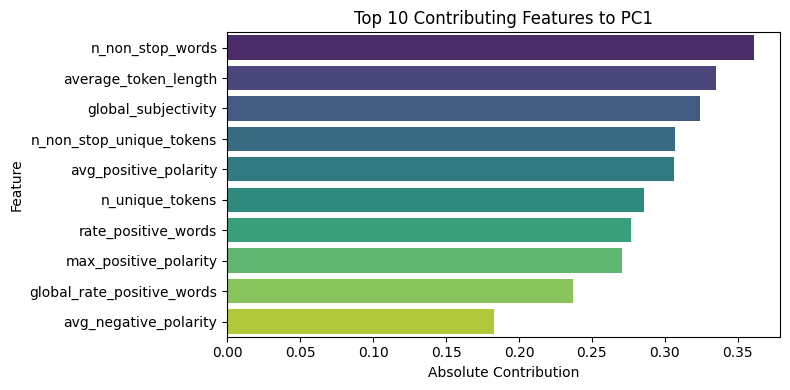

<ipython-input-11-68c7a49397c4>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_features.values, y=top_features.index, palette='viridis')


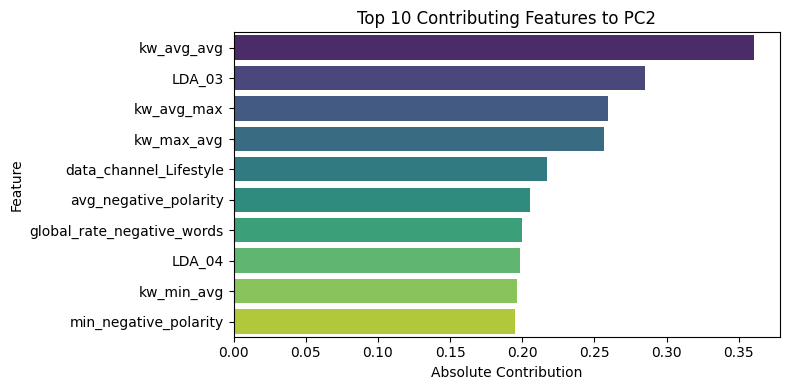

<ipython-input-11-68c7a49397c4>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_features.values, y=top_features.index, palette='viridis')


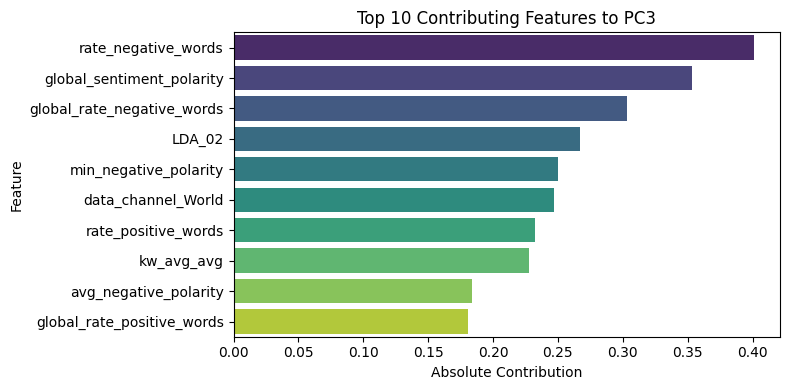

In [11]:
import seaborn as sns

# 8. 각 주성분에서 영향력이 큰 변수 시각화 (PC1~PC3 기준)
top_n = 10  # 주성분당 상위 몇 개 변수 볼지

for i in range(3):  # PC1~PC3
    pc_name = f'PC{i+1}'
    component = pd.Series(pca.components_[i], index=X.columns)
    top_features = component.abs().sort_values(ascending=False).head(top_n)

    plt.figure(figsize=(8, 4))
    sns.barplot(x=top_features.values, y=top_features.index, palette='viridis')
    plt.title(f'Top {top_n} Contributing Features to {pc_name}')
    plt.xlabel('Absolute Contribution')
    plt.ylabel('Feature')
    plt.tight_layout()
    plt.show()
